<h1> Data Analytics Project </h1>

<h3> United Kingdom Road Accident Data Analysis </h3>
<h3> Inclusive Years: 2019 - 2022 </h3>
<p> Analyst: Nicole Patrice Torrero <p>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

In [2]:
accident = pd.read_csv(r'C:\Users\Nicole\Dropbox\My PC (LAPTOP-GMMMAPFI)\Downloads\datasets\accident data.csv')

<h1> Data Preparation </h1>

In [3]:
accident.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

<h1> Converting Object to DateTime Data Type </h1>

In [4]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors = 'coerce')

In [5]:
accident.dtypes
# accident['Accident Date']

Index                              object
Accident_Severity                  object
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
dtype: object

<h1> Data Cleansing </h1>
<h3> Filling out null Values</h3>

In [6]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mode()[0])
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mode()[0])
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna('unknown surface condition')  
accident['Road_Type'] = accident['Road_Type'].fillna('unaccounted')
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna('unaccounted')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna('unaccounted')

<h1> Categorical Data Fields </h1>

In [7]:
accident['Accident_Severity'] = accident['Accident_Severity'].astype('category')
accident['Light_Conditions'] = accident['Light_Conditions'].astype('category')
accident['District Area'] = accident['Accident_Severity'].astype('category')
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].astype('category')
accident['Road_Type'] = accident['Road_Type'].astype('category')
accident['Weather_Conditions'] = accident['Weather_Conditions'].astype('category')
accident['Vehicle_Type'] = accident['Vehicle_Type'].astype('category')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].astype('category')


<h1> Extracting Date information using pandas date time </h1>

In [8]:
accident['Year'] = accident['Accident Date'].dt.year
accident['Month'] = accident['Accident Date'].dt.month
accident['Day'] = accident['Accident Date'].dt.day
accident['Day of the Week'] = accident['Accident Date'].dt.dayofweek

In [9]:
df_2019 = accident[accident['Year'] == 2019]

<h1> Univariate Analysis from year 2019 </h1>
<h3> Question 1. How many incidents happened under light conditions? </h3>

In [10]:
df_2019['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       133042
Darkness - lights lit           35769
Darkness - no lighting          10842
Darkness - lighting unknown      1768
Darkness - lights unlit           694
Name: count, dtype: int64

<h1> Insight 1 </h1>
<p> Daylight constitute to 132% of the total accidents from year 2019 </p>

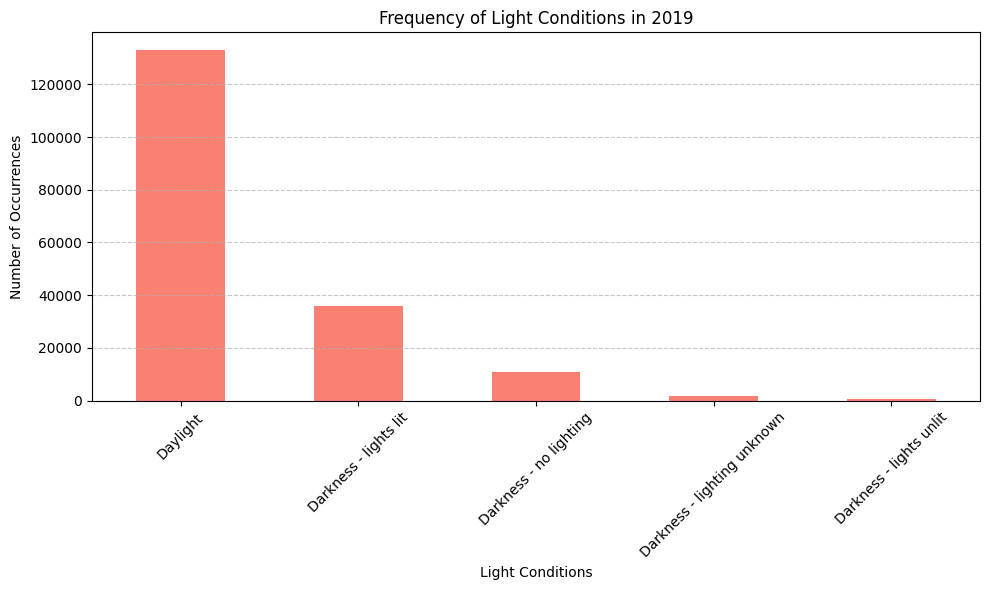

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

light_counts = df_2019['Light_Conditions'].value_counts()

# Plot
plt.figure(figsize=(10,6))
light_counts.plot(kind='bar', color='salmon')
plt.title('Frequency of Light Conditions in 2019')
plt.xlabel('Light Conditions')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<h1> Question. 2 </h1>
<h3> Which way shows a high number of slight accidents? </h3>

In [12]:
g = accident.groupby(['Accident_Severity', 'Weather_Conditions', 'Road_Type']).size()
g


Accident_Severity  Weather_Conditions  Road_Type         
Fatal              Fine + high winds   Dual carriageway        32
                                       One way street           5
                                       Roundabout               5
                                       Single carriageway     133
                                       Slip road                0
                                                             ... 
Slight             unaccounted         One way street         298
                                       Roundabout            1161
                                       Single carriageway    8755
                                       Slip road              142
                                       unaccounted            831
Length: 162, dtype: int64

<h1> Insight 2 </h1>
<p> One-way streets and roundabouts show a high number of slight accidents. </p>

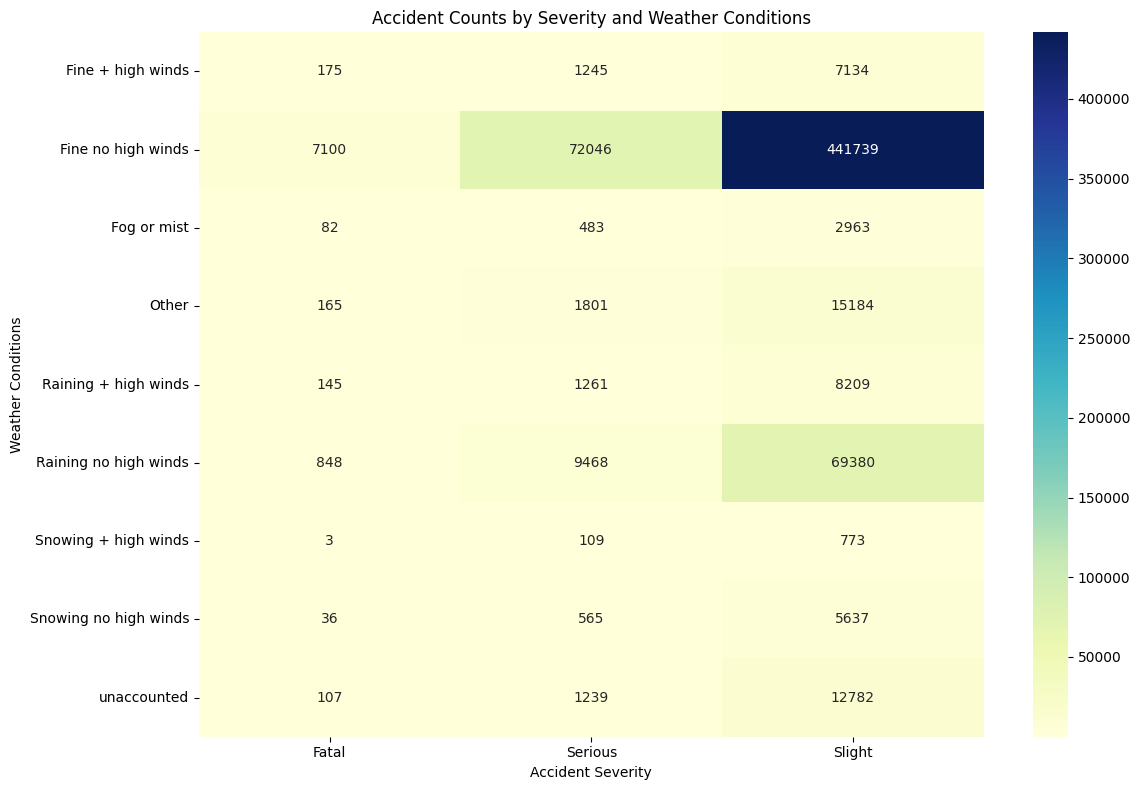

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


g = accident.groupby(['Accident_Severity', 'Weather_Conditions', 'Road_Type']).size().reset_index(name='Count')

pivot_table = g.pivot_table(index='Weather_Conditions', columns='Accident_Severity', values='Count', aggfunc='sum')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='g', cmap='YlGnBu')
plt.title('Accident Counts by Severity and Weather Conditions')
plt.xlabel('Accident Severity')
plt.ylabel('Weather Conditions')
plt.tight_layout()
plt.show()


<h1> Question 3. </h1>
<h3>  What are the most common accidents in urban or rural areas?</h3>


In [14]:
b = accident.groupby(['Accident_Severity', 'Urban_or_Rural_Area']).size()
b

Accident_Severity  Urban_or_Rural_Area
Fatal              Rural                    5601
                   Unallocated                 0
                   Urban                    3060
                   unaccounted                 0
Serious            Rural                   37312
                   Unallocated                 1
                   Urban                   50902
                   unaccounted                 2
Slight             Rural                  196077
                   Unallocated                10
                   Urban                  367701
                   unaccounted                13
dtype: int64

<h1> Insight 3</h1>
<p> Fatal accidents are more common in rural areas a total of 5,601, compared to urban areas which is 3,060. </p>

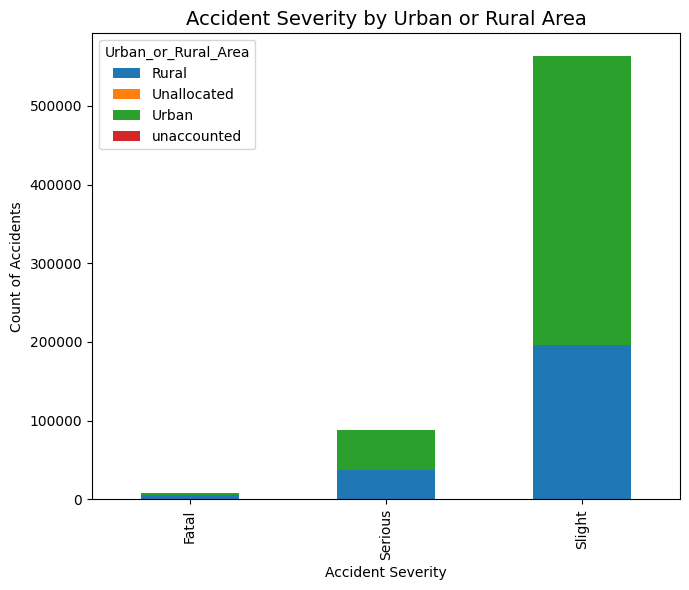

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

b = accident.groupby(['Accident_Severity', 'Urban_or_Rural_Area']).size().unstack()

b.plot(kind='bar', stacked=True, figsize=(7, 6))

plt.title('Accident Severity by Urban or Rural Area', fontsize=14)
plt.xlabel('Accident Severity')
plt.ylabel('Count of Accidents')

plt.tight_layout()
plt.show()


<h1> Insight 4 </h1>
<h3> Did serious accidents increase or decrease over time? </h3>

In [16]:
accident['Accident Year'] = accident['Accident Date'].dt.year
a = accident.groupby(['Accident Year', 'Accident_Severity'])['Number_of_Casualties'].sum()
a

Accident Year  Accident_Severity
2019           Fatal                  5351
               Serious               36096
               Slight               206333
2020           Fatal                  4398
               Serious               33987
               Slight               192520
2021           Fatal                  3879
               Serious               32311
               Slight               185956
2022           Fatal                  2855
               Serious               27045
               Slight               165837
Name: Number_of_Casualties, dtype: int64

<h1> Insight 4 </h1>
<p>Serious accidents decreased from 36,096 in 2019 to 27,045 in 2022, showing a clear reduction over the years.</p>

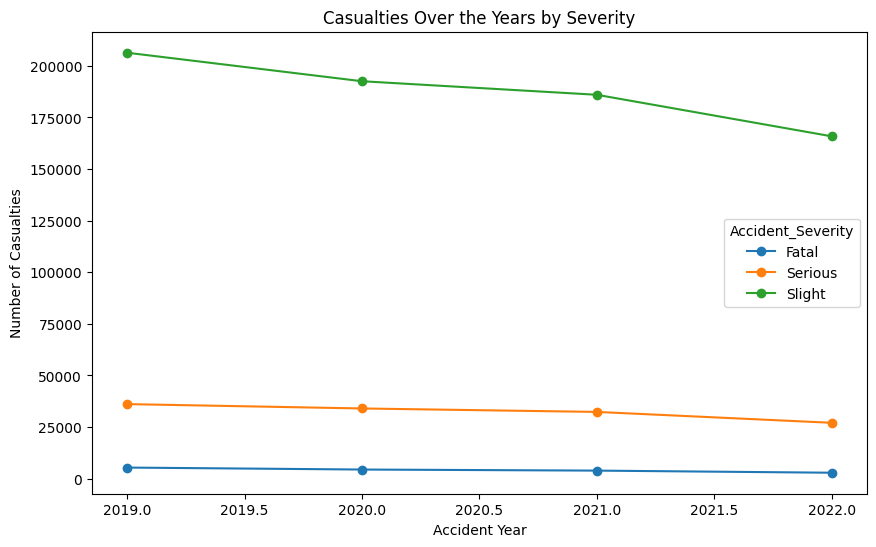

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

accident['Accident Year'] = accident['Accident Date'].dt.year
a = accident.groupby(['Accident Year', 'Accident_Severity'])['Number_of_Casualties'].sum().unstack()


a.plot(kind='line', figsize=(10, 6), marker='o')

plt.xlabel('Accident Year')
plt.ylabel('Number of Casualties')
plt.title('Casualties Over the Years by Severity')

# Show the plot
plt.show()


<h1> Question 5. </h1>
<h3> Do most fatal accidents happen during the day or at night, and which is more dangerous? </h3>

In [18]:
b = accident.groupby(['Accident_Severity', 'Light_Conditions']).size()
b

Accident_Severity  Light_Conditions           
Fatal              Darkness - lighting unknown        68
                   Darkness - lights lit            1860
                   Darkness - lights unlit            45
                   Darkness - no lighting           1612
                   Daylight                         5076
Serious            Darkness - lighting unknown       794
                   Darkness - lights lit           19130
                   Darkness - lights unlit           360
                   Darkness - no lighting           7174
                   Daylight                        60759
Slight             Darkness - lighting unknown      5622
                   Darkness - lights lit          108345
                   Darkness - lights unlit          2138
                   Darkness - no lighting          28651
                   Daylight                       419045
dtype: int64

<h1> Insight 5 </h1>
<p> Most fatal accidents occur during daylight, but nighttime presents a higher risk. </p>

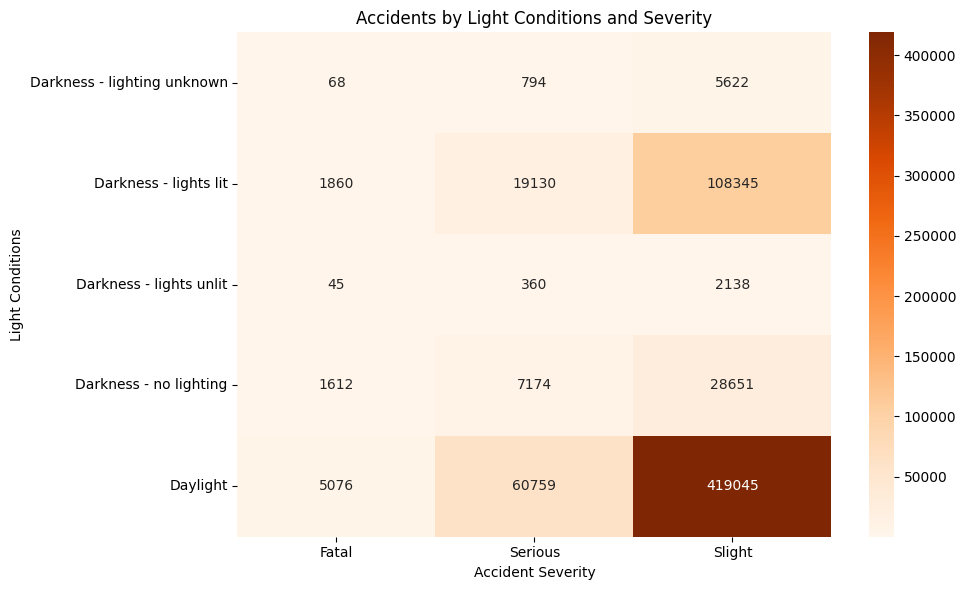

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

b = accident.groupby(['Accident_Severity', 'Light_Conditions']).size().reset_index(name='Count')

pivot_b = b.pivot_table(index='Light_Conditions', columns='Accident_Severity', values='Count', aggfunc='sum')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_b, annot=True, fmt='g', cmap='Oranges')
plt.title('Accidents by Light Conditions and Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Light Conditions')
plt.tight_layout()
plt.show()


<h1> Question 6.</h1>
<h3> Which district areas have the highest accident frequency for each level of accident severity? </h3>

In [20]:
accidents_by_area_severity = accident.groupby(['District Area', 'Accident_Severity']).size().reset_index(name='Accident_Count')
accidents_by_area_severity

,District Area,Accident_Severity,Accident_Count
0,Fatal,Fatal,8661
1,Fatal,Serious,0
2,Fatal,Slight,0
3,Serious,Fatal,0
4,Serious,Serious,88217
5,Serious,Slight,0
6,Slight,Fatal,0
7,Slight,Serious,0
8,Slight,Slight,563801


<h1> Insight 6 </h1>
<p> The highest number of serious accidents occurred in a district, with a total of 88,217 cases, making it the area with the most severe incidents. </p>

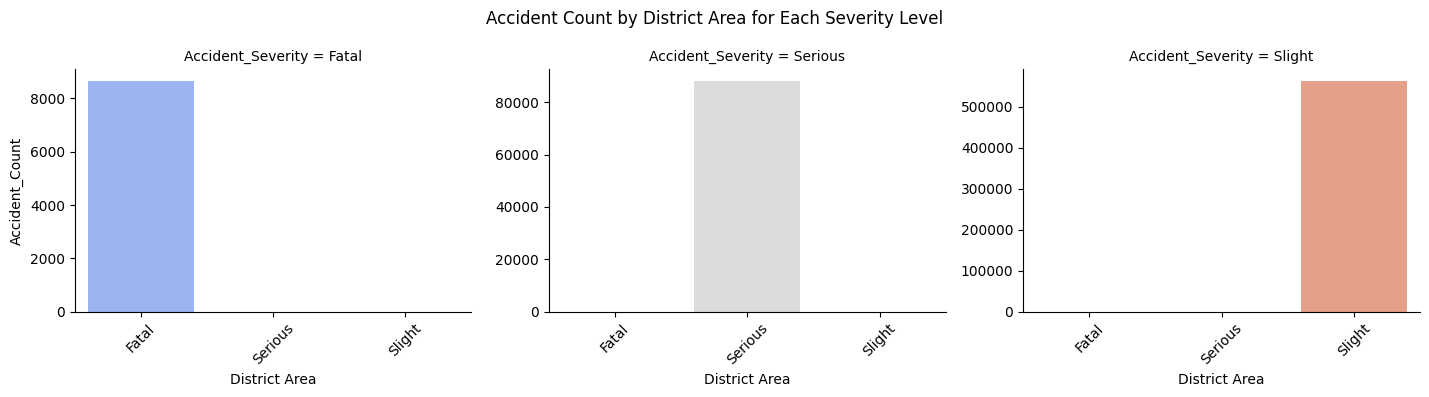

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

n_severity = accidents_by_area_severity['Accident_Severity'].nunique()

g = sns.FacetGrid(accidents_by_area_severity, col='Accident_Severity', height=4, aspect=1.2, sharey=False)


g.map_dataframe(sns.barplot, x='District Area', y='Accident_Count', palette='coolwarm')

g.set_xticklabels(rotation=45)

g.fig.suptitle('Accident Count by District Area for Each Severity Level', fontsize=12)

plt.tight_layout()
plt.show()


<h1> Insight 7 </h1>
<h3> How many accidents occurred in each district for each level of severity? </h3>

In [22]:
urban_rural_accidents = accidents_by_area_severity.groupby(['District Area', 'Accident_Severity'])['Accident_Count'].sum().unstack().fillna(0)
urban_rural_accidents

Accident_Severity,Fatal,Serious,Slight
District Area,,,
Fatal,8661,0,0
Serious,0,88217,0
Slight,0,0,563801


<h1> Insight 7 </h1>
<ul>
    <li> Fatal Districts: Recorded 8,661 fatal accidents, but no serious or slight accidents. </li>
    <li> Serious Districts: Had 88,217 serious accidents, with no fatal or slight accidents. </li>
    <li> Slight Districts: Experienced 563,801 slight accidents, without any fatal or serious cases. </li>
</ul>

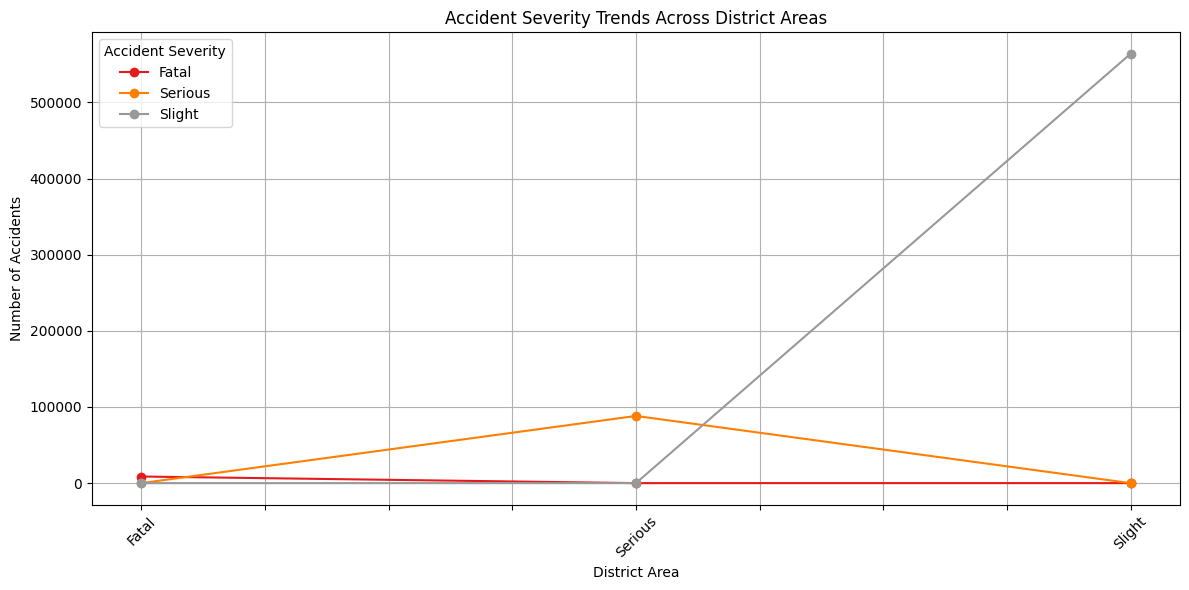

In [23]:
import matplotlib.pyplot as plt

urban_rural_accidents.plot(kind='line', marker='o', figsize=(12, 6), colormap='Set1')

plt.title('Accident Severity Trends Across District Areas')
plt.xlabel('District Area')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(title='Accident Severity')
plt.grid(True)
plt.tight_layout()
plt.show()


<h1> Question 8.</h1>
<h3> How many accidents of each severity (Fatal, Serious, Slight) were reported in the district area, and what is the breakdown of these accidents? </h3>

In [24]:
accidents_by_area = accident.groupby(['District Area', 'Accident_Severity']).size().reset_index(name='Accident_Count')
accidents_by_area


,District Area,Accident_Severity,Accident_Count
0,Fatal,Fatal,8661
1,Fatal,Serious,0
2,Fatal,Slight,0
3,Serious,Fatal,0
4,Serious,Serious,88217
5,Serious,Slight,0
6,Slight,Fatal,0
7,Slight,Serious,0
8,Slight,Slight,563801


<h1> Insight 8 </h1>
<p> Fatal accidents were significantly lower in number, with only 8,661 recorded, all of which were categorized as fatal. </p>

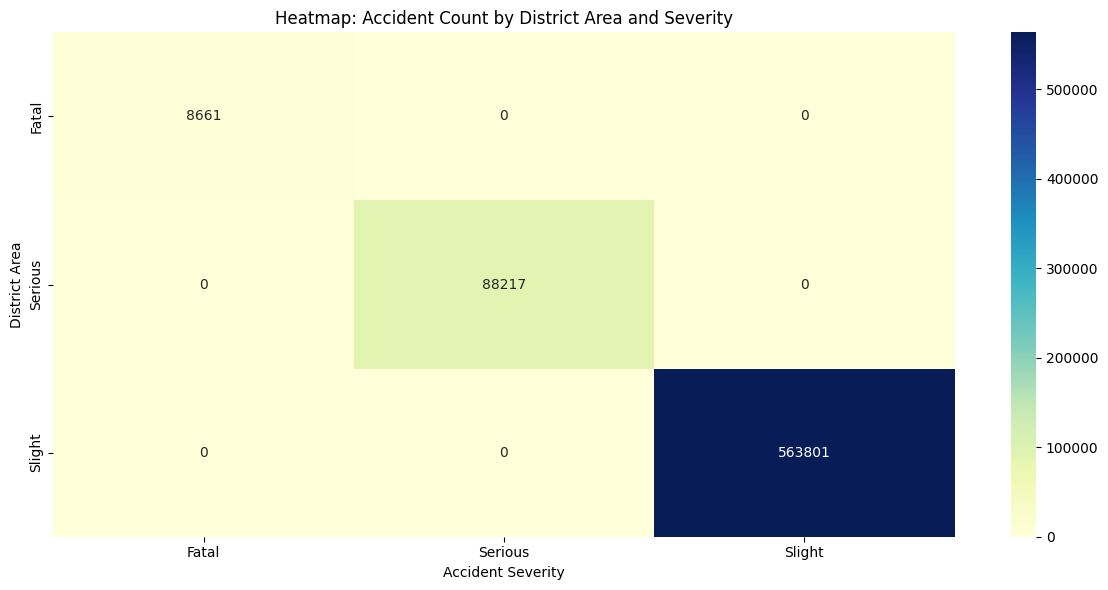

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot_data = accidents_by_area.pivot_table(
    index='District Area',
    columns='Accident_Severity',
    values='Accident_Count',
    aggfunc='sum'
).fillna(0)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_data, annot=True, fmt='g', cmap='YlGnBu')

plt.title('Heatmap: Accident Count by District Area and Severity')
plt.xlabel('Accident Severity')
plt.ylabel('District Area')
plt.tight_layout()
plt.show()


<h1> Question 9. </h1>
<h3> Does fog contribute to a high number of accidents on single carriageways? </h3>

In [26]:
weather_road_analysis = accident.groupby(['Weather_Conditions', 'Road_Type'])['Accident_Severity'].count().unstack()
weather_road_analysis


Road_Type,Dual carriageway,One way street,Roundabout,Single carriageway,Slip road,unaccounted
Weather_Conditions,,,,,,
Fine + high winds,1519,158,540,6178,109,50
Fine no high winds,76916,11057,34667,389830,5520,2895
Fog or mist,682,29,222,2541,33,21
Other,2264,309,1109,13156,180,132
Raining + high winds,2033,153,563,6703,107,56
Raining no high winds,13044,1429,5347,58581,865,430
Snowing + high winds,185,14,30,642,10,4
Snowing no high winds,1020,78,290,4751,69,30
unaccounted,1761,332,1224,9761,148,902


<h1> Insight 9 </h1>
<p> Fog causes fewer accidents with an overall 2,541 on single carriageways </p>

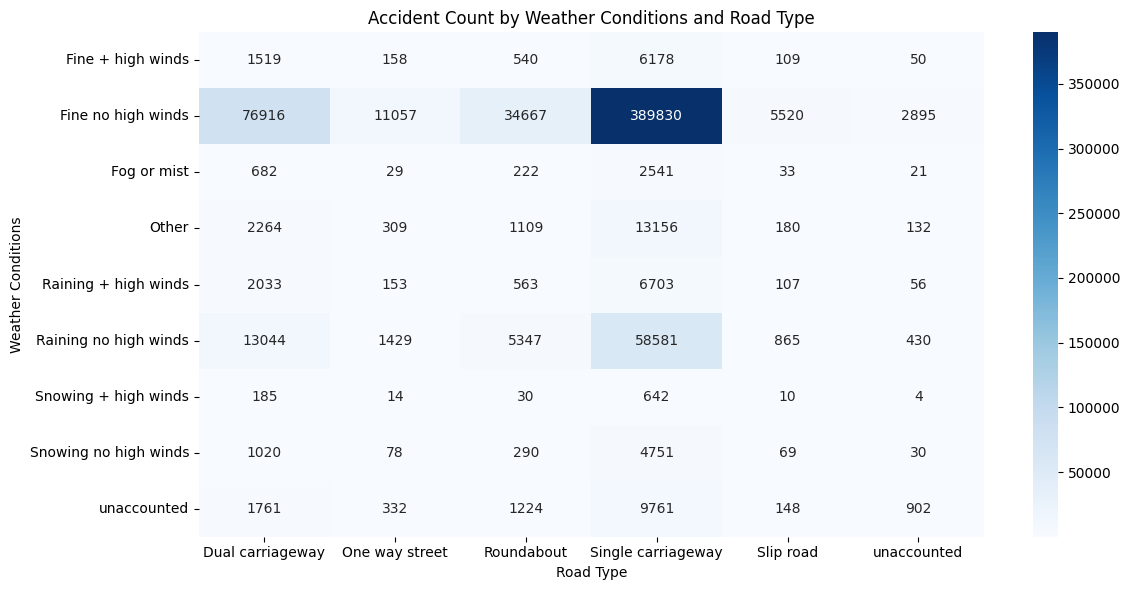

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(weather_road_analysis, annot=True, fmt='g', cmap='Blues')

plt.title('Accident Count by Weather Conditions and Road Type')
plt.xlabel('Road Type')
plt.ylabel('Weather Conditions')
plt.tight_layout()
plt.show()


<h1> Insight 10 </h1>
<h3> Which day of the week has the highest number of accidents? </h3>

In [28]:
accident['Day_of_Week'] = pd.to_datetime(accident['Accident Date']).dt.day_name()
d = accident.groupby('Day_of_Week').size().sort_values(ascending=False)
d

Day_of_Week
Saturday     107178
Wednesday     99558
Thursday      99511
Friday        97900
Tuesday       94550
Sunday        89302
Monday        72680
dtype: int64

<h1> Insight 10 </h1>
<p>  Saturday has the highest number of accidents </p>

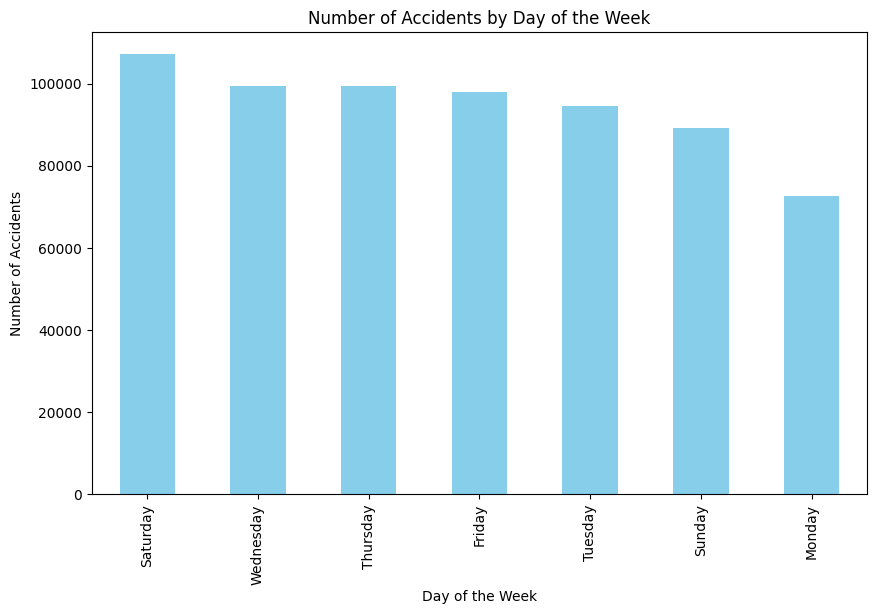

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

accident['Day_of_Week'] = pd.to_datetime(accident['Accident Date']).dt.day_name()

d = accident.groupby('Day_of_Week').size().sort_values(ascending=False)

d.plot(kind='bar', figsize=(10, 6), color='skyblue')

plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Day of the Week')

plt.show()


<h1> Insight 11 </h1>
<h3> In which month do fatal accidents occur the most and the least? </h3>

In [30]:
accident['Month'] = pd.to_datetime(accident['Accident Date']).dt.month
e = accident.groupby('Month')['Accident_Severity'].value_counts(normalize=True).unstack() * 100
np.round(e, 2)


Accident_Severity,Fatal,Serious,Slight
Month,,,
1,1.40,12.64,85.96
2,1.25,12.62,86.13
3,1.26,13.16,85.58
4,1.35,14.18,84.48
5,1.35,13.70,84.95
6,1.19,14.02,84.79
7,1.31,13.69,85.00
8,1.49,13.97,84.54
9,1.28,14.15,84.57


<h1> Insight 11 </h1>
<p> Fatal accidents happen the most in August (1.49%) and the least in June (1.19%). </p>

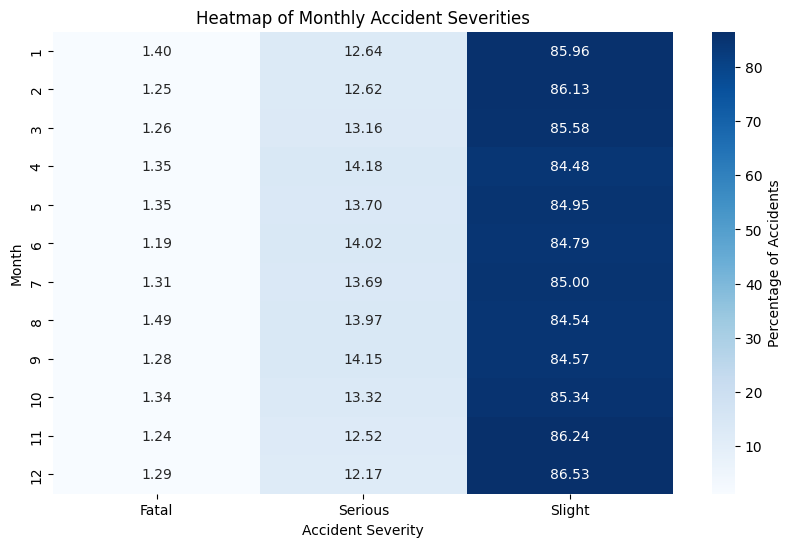

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

accident['Month'] = pd.to_datetime(accident['Accident Date']).dt.month

e = accident.groupby('Month')['Accident_Severity'].value_counts(normalize=True).unstack() * 100

e_rounded = np.round(e, 2)

plt.figure(figsize=(10, 6))
sns.heatmap(e_rounded, annot=True, cmap='Blues', fmt='.2f', cbar_kws={'label': 'Percentage of Accidents'})

plt.xlabel('Accident Severity')
plt.ylabel('Month')
plt.title('Heatmap of Monthly Accident Severities')

plt.show()


<h1> Question 12 </h1>
<h3> What is the most frequent accident severity? </h3>

In [32]:
severity = accident['Accident_Severity'].value_counts()
severity

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

<h1> Insight 12 </h1>
<p> The majority of accidents are classified as slight, with a total of 563,801 occurrences. This is followed by serious accidents, which number 88,217, and fatal accidents, which are the least frequent, at 8,661. </p>

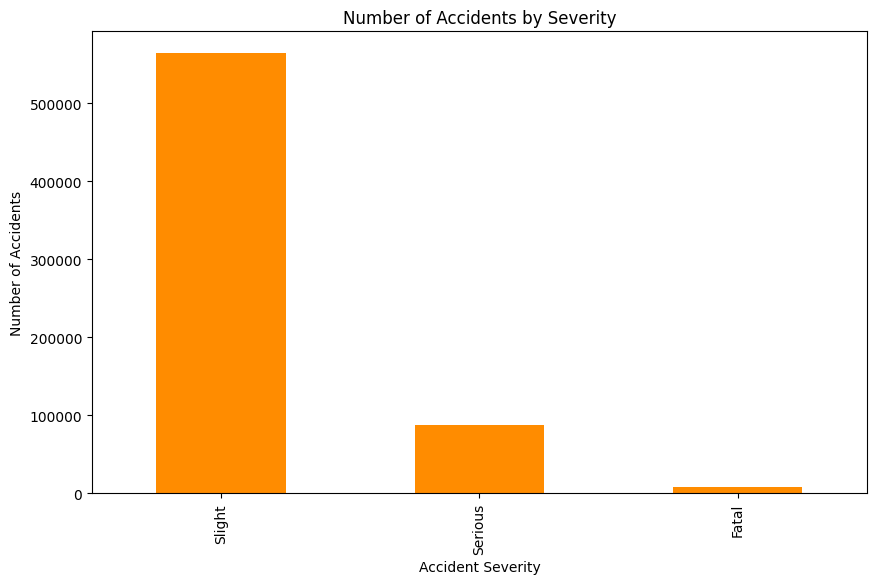

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

severity = accident['Accident_Severity'].value_counts()

severity.plot(kind='bar', figsize=(10, 6), color='darkorange') 

plt.xlabel('Accident Severity')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Severity')

# Show the plot
plt.show()


In [34]:
accident.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
Year                                int32
Month                               int32
Day                                 int32
Day of the Week                     int32
Accident Year                       int32
Day_of_Week                        object
dtype: object

<h1> Question 13. </h1>
<h3> What is the most common light condition during accidents?</h3>

In [35]:
light_conditions = accident['Light_Conditions'].value_counts()
light_conditions

Light_Conditions
Daylight                       484880
Darkness - lights lit          129335
Darkness - no lighting          37437
Darkness - lighting unknown      6484
Darkness - lights unlit          2543
Name: count, dtype: int64

<h1> Insight 13 </h1>
<p> The highest number of accidents happened in daylight recorded with 484,880 incidents meanwhile129,335 occured in darkness </p>

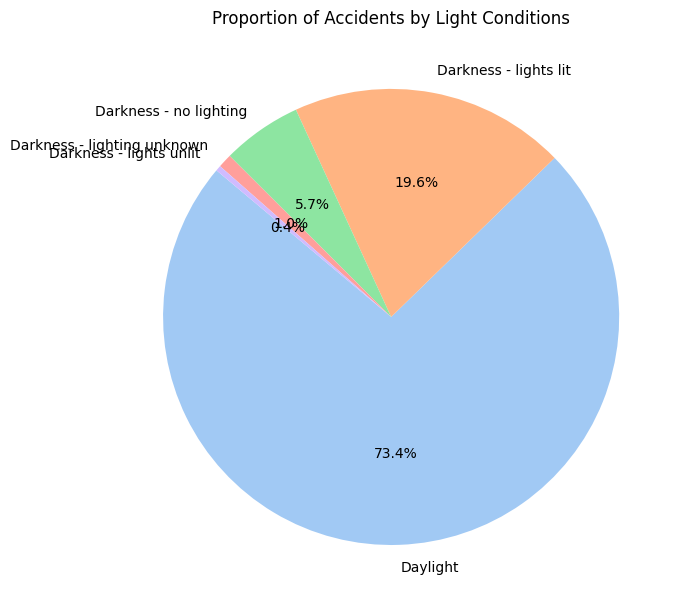

In [36]:
plt.figure(figsize=(7, 7))
plt.pie(light_conditions.values, labels=light_conditions.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))

plt.title('Proportion of Accidents by Light Conditions')
plt.tight_layout()
plt.show()


<h1> Question 14. </h1>
<h3> What is the most frequent weather condition during accidents? </h3>

In [37]:
frequent_conditions = accident['Weather_Conditions'].value_counts()
frequent_conditions

Weather_Conditions
Fine no high winds       520885
Raining no high winds     79696
Other                     17150
unaccounted               14128
Raining + high winds       9615
Fine + high winds          8554
Snowing no high winds      6238
Fog or mist                3528
Snowing + high winds        885
Name: count, dtype: int64

<h1> Insight 14 </h1>
<p> The most common weather conditions during accidents is "Fine no high winds" with 520,885 incidents.</p>

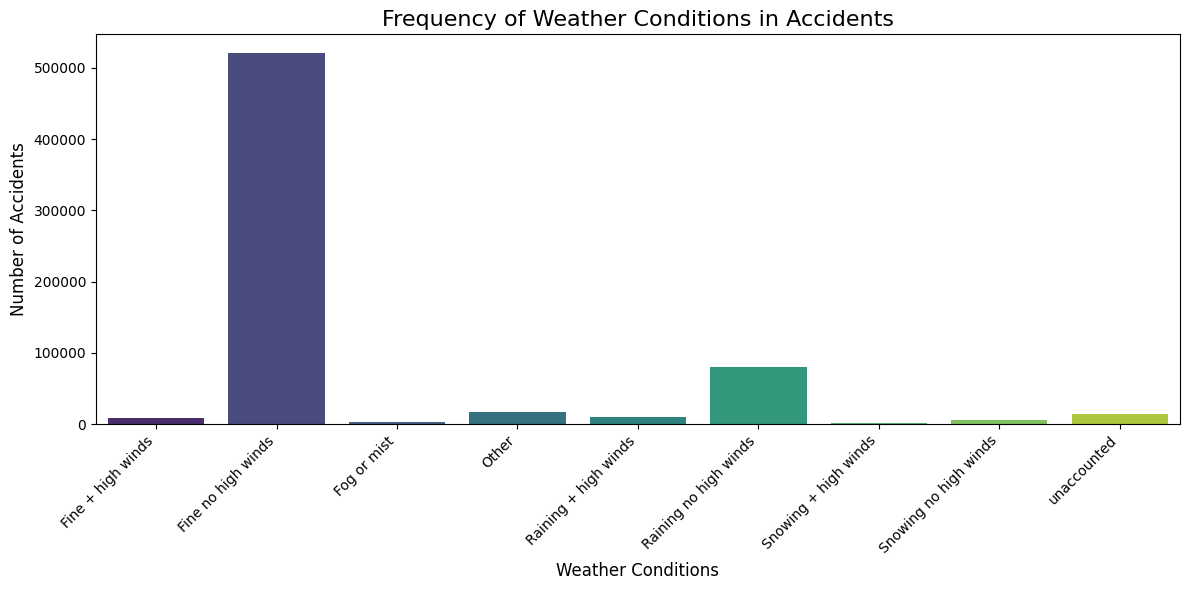

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

frequent_conditions = accident['Weather_Conditions'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=frequent_conditions.index, y=frequent_conditions.values, palette="viridis")

plt.title('Frequency of Weather Conditions in Accidents', fontsize=16)
plt.xlabel('Weather Conditions', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<h1> Question 15 </h1>
<p> What is the average number of vehicles involved in each accident? </p>

In [39]:
vehicle = accident['Number_of_Vehicles'].mean()
vehicle 

1.8312554205597575

<h1> Insight 15 </h1>
<p> The average number of vehicles involved in each accident is approximately 1.83.</p>

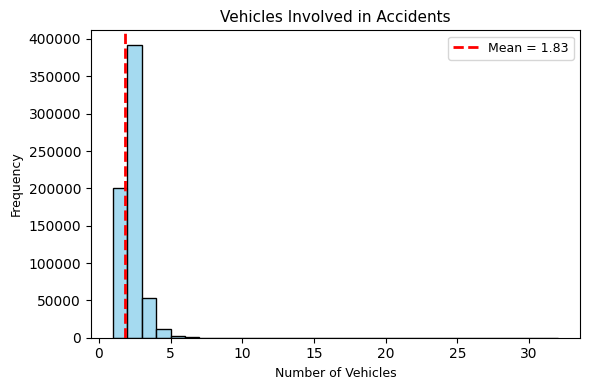

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

vehicle = accident['Number_of_Vehicles'].mean()

plt.figure(figsize=(6, 4))
sns.histplot(accident['Number_of_Vehicles'], bins=range(1, accident['Number_of_Vehicles'].max() + 1), kde=False, color='skyblue')

plt.axvline(vehicle, color='red', linestyle='dashed', linewidth=2, label=f'Mean = {vehicle:.2f}')

plt.title('Vehicles Involved in Accidents', fontsize=11)
plt.xlabel('Number of Vehicles', fontsize=9)
plt.ylabel('Frequency', fontsize=9)
plt.legend(fontsize=9)
plt.tight_layout()
plt.show()


<h1> BiVariate </h1>
<h3> Question 16. </h3>
<h3> How does the weather affect the number of accidents? </h3>

In [41]:
no_of_accidents = accident.groupby('Weather_Conditions')['Accident Date'].count().sort_values(ascending=False)
no_of_accidents

Weather_Conditions
Fine no high winds       520885
Raining no high winds     79696
Other                     17150
unaccounted               14128
Raining + high winds       9615
Fine + high winds          8554
Snowing no high winds      6238
Fog or mist                3528
Snowing + high winds        885
Name: Accident Date, dtype: int64

<h1> Insight 16 </h1>
<p> The highest number of accidents occurred during fine weather with no high winds (520,885 cases). This was followed by raining without high winds (79,696 cases). </p>

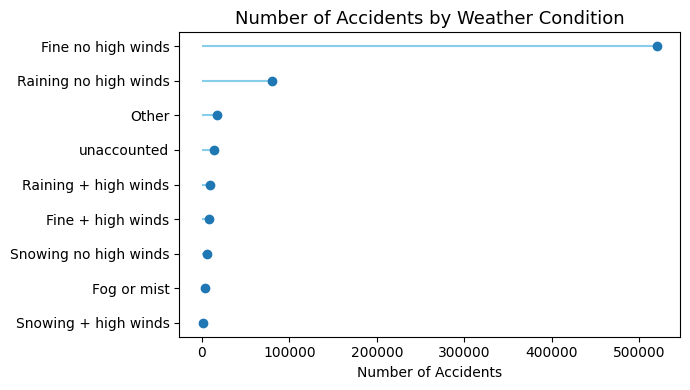

In [42]:
import matplotlib.pyplot as plt

no_of_accidents = accident.groupby('Weather_Conditions')['Accident Date'].count().sort_values(ascending=True)

plt.figure(figsize=(7, 4))
plt.hlines(y=no_of_accidents.index, xmin=0, xmax=no_of_accidents.values, color='skyblue')
plt.plot(no_of_accidents.values, no_of_accidents.index, "o")
plt.title('Number of Accidents by Weather Condition', fontsize=13)
plt.xlabel('Number of Accidents')
plt.tight_layout()
plt.show()


<h1> Question 17 </h1>
<h3> Which road type experienced the most accidents? </h3>

In [43]:
road_type_accidents = accident['Road_Type'].value_counts()
road_type_accidents 

Road_Type
Single carriageway    492143
Dual carriageway       99424
Roundabout             43992
One way street         13559
Slip road               7041
unaccounted             4520
Name: count, dtype: int64

<h1> Insight 17 </h1>
<p> The road type that experienced the most accidents is the Single carriageway, with 492,143 accidents</p>

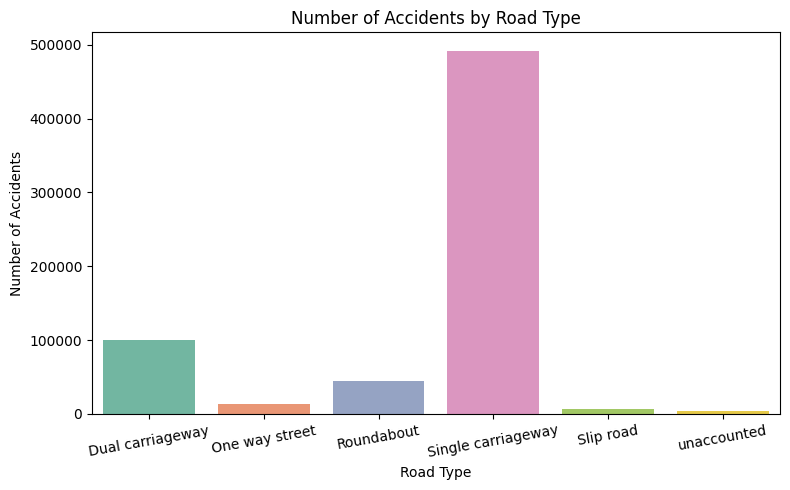

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=road_type_accidents.index, y=road_type_accidents.values, palette='Set2')

plt.title('Number of Accidents by Road Type')
plt.xlabel('Road Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()


<h1> Question 18 </h1>
<h3> What is the monthly average of accidents?</h3>

In [45]:
accident_per_month = accident['Accident Date'].groupby(accident['Accident Date'].dt.month).count().mean()
accident_per_month 

55056.583333333336

<h1> Insight 18 </h1>
<p> The monthly average number of accidents is approximately 55,057. This means that, on average, there are about 55,057 accidents reported each month. </p>

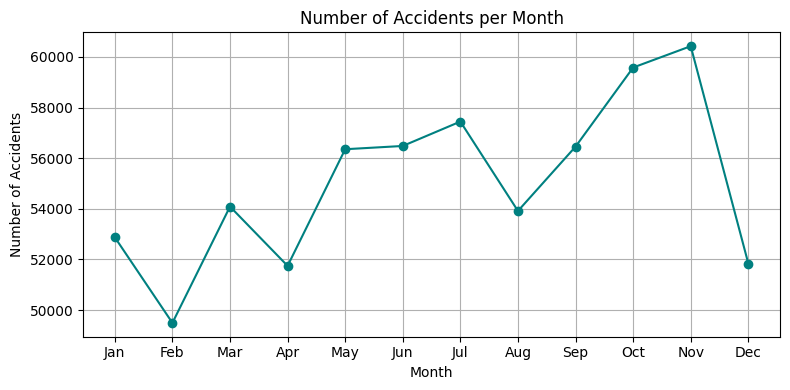

In [46]:
import matplotlib.pyplot as plt

accidents_by_month = accident['Accident Date'].groupby(accident['Accident Date'].dt.month).count()

plt.figure(figsize=(8, 4))
plt.plot(accidents_by_month.index, accidents_by_month.values, marker='o', linestyle='-', color='teal')

plt.title('Number of Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.grid(True)
plt.tight_layout()
plt.show()


<h1> Question 19. </h1>
<h3> What is the average number of accidents that occurred between 2019 and 2022?</h3>

In [47]:
accidents_in_2019 = accident[accident['Accident Date'].dt.year == 2019]['Accident Date'].count()
accidents_in_2022 = accident[accident['Accident Date'].dt.year == 2022]['Accident Date'].count()
total_accidents = accidents_in_2019 + accidents_in_2022
total_accidents

326534

<h1> Insight 19 </h1>
<p> The average number of accidents that occurred between 2019 and 2022 is 326,534. </p>

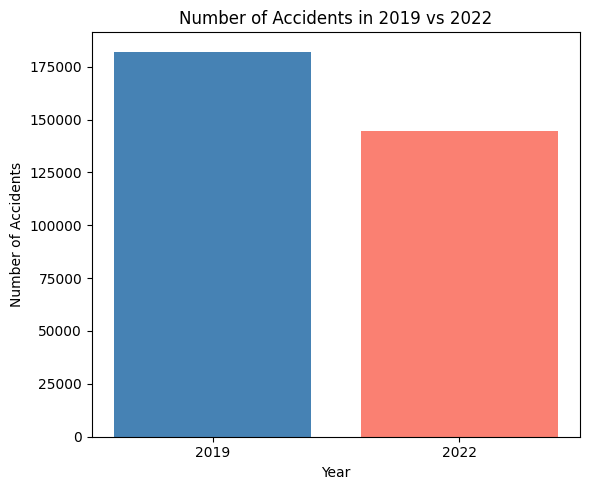

In [48]:
import matplotlib.pyplot as plt

# Values
years = ['2019', '2022']
accident_counts = [accidents_in_2019, accidents_in_2022]

# Plot
plt.figure(figsize=(6, 5))
plt.bar(years, accident_counts, color=['steelblue', 'salmon'])

plt.title('Number of Accidents in 2019 vs 2022')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()


<h1> Question 20.</h1>
<h3> How many casualties were reported for each vehicle type in 2019? </h3>

In [49]:
casualties = df_2019.groupby(['Vehicle_Type'])['Number_of_Casualties'].count()
casualties

Vehicle_Type
Agricultural vehicle                        636
Bus or coach (17 or more pass seats)      10483
Car                                      130304
Data missing or out of range                  0
Goods 7.5 tonnes mgw and over              6247
Goods over 3.5t. and under 7.5t            2049
Minibus (8 - 16 passenger seats)            625
Motorcycle 125cc and under                 4313
Motorcycle 50cc and under                  2136
Motorcycle over 125cc and up to 500cc      2446
Motorcycle over 500cc                      7686
Other vehicle                              1588
Pedal cycle                                  68
Ridden horse                                  1
Taxi/Private hire car                      4230
Van / Goods 3.5 tonnes mgw or under        9303
Name: Number_of_Casualties, dtype: int64

<h1>Insight 20 </h1>
<p>Various vehicle types were involved in accidents during 2019, each contributing to a different number of casualties. Cars had the highest number of casualties, with a total of 130,304 reported. </p>

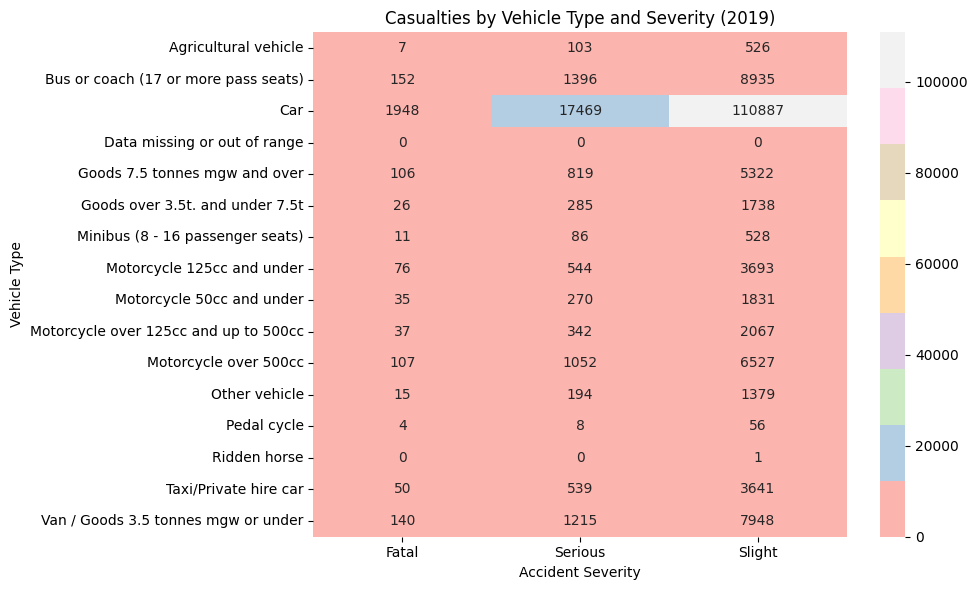

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group and reshape data
heat_data = df_2019.groupby(['Vehicle_Type', 'Accident_Severity'])['Number_of_Casualties'].count().unstack().fillna(0)

# Plot heatmap with a light color palette
plt.figure(figsize=(10, 6))
sns.heatmap(heat_data, annot=True, fmt='g', cmap='Pastel1')

plt.title('Casualties by Vehicle Type and Severity (2019)')
plt.xlabel('Accident Severity')
plt.ylabel('Vehicle Type')
plt.tight_layout()
plt.show()


<h1> Question 21. </h1>
<h3> How are weather conditions connected to light conditions in road accidents?< <3h1>

In [51]:
weather_conditions = accident.groupby(['Weather_Conditions', 'Light_Conditions'])['Accident Date'].count()
weather_conditions

Weather_Conditions     Light_Conditions           
Fine + high winds      Darkness - lighting unknown        59
                       Darkness - lights lit            1852
                       Darkness - lights unlit            51
                       Darkness - no lighting            796
                       Daylight                         5796
Fine no high winds     Darkness - lighting unknown      3683
                       Darkness - lights lit           91951
                       Darkness - lights unlit          1700
                       Darkness - no lighting          24867
                       Daylight                       398684
Fog or mist            Darkness - lighting unknown        65
                       Darkness - lights lit             921
                       Darkness - lights unlit            37
                       Darkness - no lighting            862
                       Daylight                         1643
Other                  Darkness - 

<h1> Insight 21 </h1>
<p> Weather conditions like fog, snow, and rain are linked to more accidents in darkness, especially when there is no lighting or unlit lights. </p>

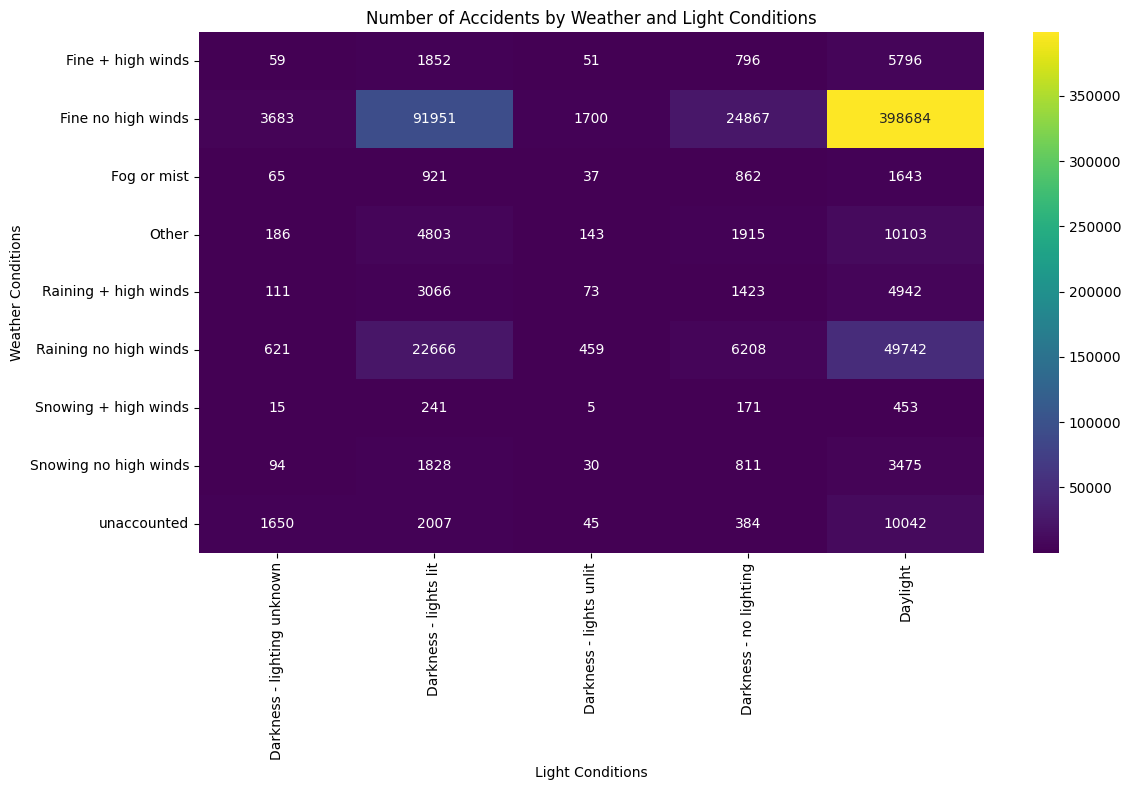

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping the data
weather_conditions = accident.groupby(['Weather_Conditions', 'Light_Conditions'])['Accident Date'].count()

# Convert to DataFrame for heatmap
heatmap_data = weather_conditions.unstack(fill_value=0)

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='viridis', cbar=True)

plt.title('Number of Accidents by Weather and Light Conditions')
plt.xlabel('Light Conditions')
plt.ylabel('Weather Conditions')
plt.tight_layout()
plt.show()


<h1> Question 22. </h1>
<h3> How do vehicle types relate to accident severity across different road types?</h3>

In [46]:
accident_severity = accident.groupby(['Vehicle_Type', 'Accident_Severity', 'Road_Type']).size()
accident_severity 


Vehicle_Type                         Accident_Severity  Road_Type         
Agricultural vehicle                 Fatal              Dual carriageway          6
                                                        One way street            1
                                                        Roundabout                0
                                                        Single carriageway       14
                                                        Slip road                 0
                                                                              ...  
Van / Goods 3.5 tonnes mgw or under  Slight             One way street          623
                                                        Roundabout             2081
                                                        Single carriageway    21532
                                                        Slip road               328
                                                        unaccounted             184
L

<h1> Insight 22 </h1>
<p> Agricultural vehicles tend to be involved in more fatal accidents on single carriageways, suggesting these vehicles may have a higher risk of severe accidents on certain road types. </p>

<h1> Area Analysis </h1>

In [47]:
area_year_analysis = accident.groupby(['District Area', 'Year']).size().reset_index(name='Accident_Account')

pivot_table = area_year_analysis.pivot(index='Year', columns='District Area', values='Accident_Account' )
pivot_table

District Area,Fatal,Serious,Slight
Year,,,
2019,2714,24322,155079
2020,2341,23121,145129
2021,2057,21997,139500
2022,1549,18777,124093


<h1> Visualizing Correlation </h1>

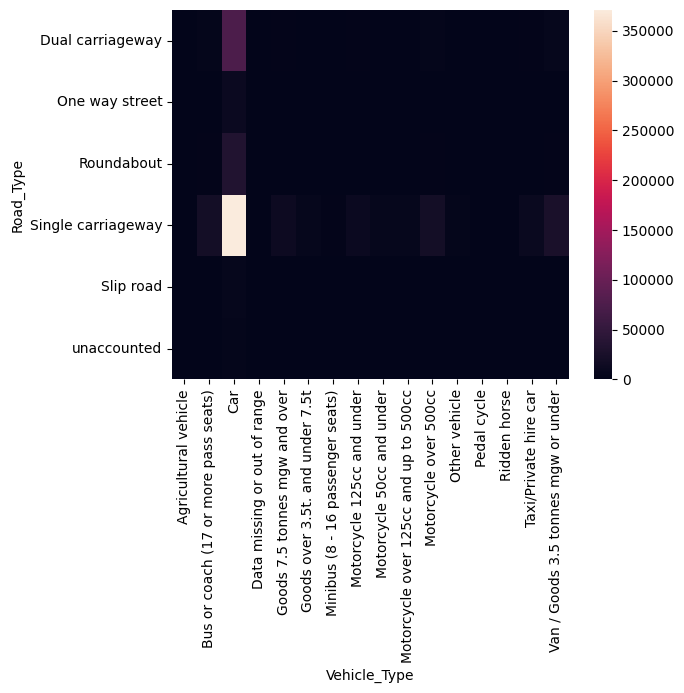

In [48]:
type_vh = accident.groupby(['Road_Type', 'Vehicle_Type']).size().unstack()

sns.heatmap(type_vh)
plt.show()